<a href="https://colab.research.google.com/github/elainepereiras/desafio4dnc/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desafio: Construindo um modelo de Regressão para marketing**



# Análise descritiva


In [ ]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns



In [ ]:
# lendo arquivo e verificando as 5 primeiras linhas
mkt = pd.read_csv("/content/MKT.csv")
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# verificando as informações, se existem dados nulos
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Certifique-se de que o DataFrame foi criado
import pandas as pd

# Exemplo de tabela com os dados de entrada
data = {
    "youtube": [100, 150, 200],  # Gastos no Youtube
    "facebook": [50, 80, 100],  # Gastos no Facebook
    "newspapers": [20, 30, 40],  # Gastos em Jornais
    "sales": [1000, 1200, 1300]  # Vendas em unidades
}

agg = pd.DataFrame(data)

# Agrupar pelos gastos no Youtube, Facebook, e Newspapers e mostrar valores únicos
agrupado = agg.groupby(["youtube", "facebook", "newspapers"]).nunique()

# Exibindo o resultado
print(agrupado)


                             sales
youtube facebook newspapers       
100     50       20              1
150     80       30              1
200     100      40              1


In [ ]:
# Analisando informações importantes
mkt[["youtube","facebook","newspaper","sales"]].describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
import pandas as pd

# Exemplo de tabela com os dados de entrada
data = {
    "youtube": [100, 150, 200],  # Gastos no Youtube
    "facebook": [50, 80, 100],  # Gastos no Facebook
    "newspapers": [20, 30, 40],  # Gastos em Jornais
    "sales": [1000, 1200, 1300]  # Vendas em unidades
}

agg = pd.DataFrame(data)

# Agrupar pelos gastos no Youtube, Facebook e Newspapers e ordenar por vendas
resultado = agg.groupby(["youtube", "facebook", "newspapers"]).sum().sort_values("sales", ascending=False).reset_index()

# Exibindo o resultado
print(resultado)


   youtube  facebook  newspapers  sales
0      200       100          40   1300
1      150        80          30   1200
2      100        50          20   1000


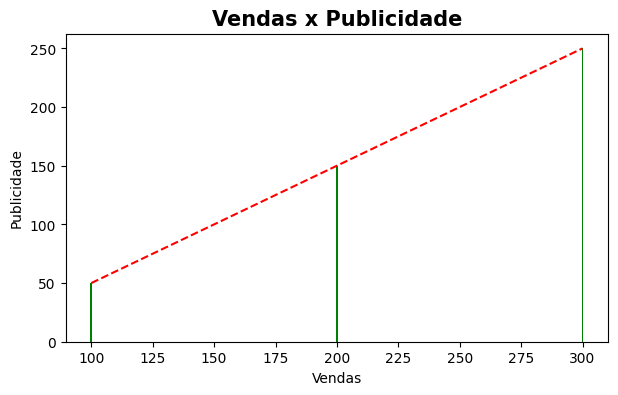

In [ ]:
fig = plt.figure(figsize=(7, 4))
plt.bar(agg["sales"], agg["youtube, facebook, newspapers"], color="green")
plt.xlabel("Vendas")
plt.ylabel("Publicidade")
plt.title("Vendas x Publicidade", loc="center",fontsize=15, fontweight="bold")
plt.plot(agg["sales"], agg["youtube, facebook, newspapers"], color="red", linestyle="--")
plt.show()

# Análise Exploratória


In [ ]:
agg.describe()

,sales,"youtube, facebook, newspapers"
count,3.0,3.0
mean,200.0,150.0
std,100.0,100.0
min,100.0,50.0
25%,150.0,100.0
50%,200.0,150.0
75%,250.0,200.0
max,300.0,250.0


from matplotlib import pyplot as plt
_df_0['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['youtube, facebook, newspapers'].plot(kind='hist', bins=20, title='youtube, facebook, newspapers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='sales', y='youtube, facebook, newspapers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['youtube, facebook, newspapers'].plot(kind='line', figsize=(8, 4), title='youtube, facebook, newspapers')
plt.gca().spines[['top', 'right']].set_visible(False)

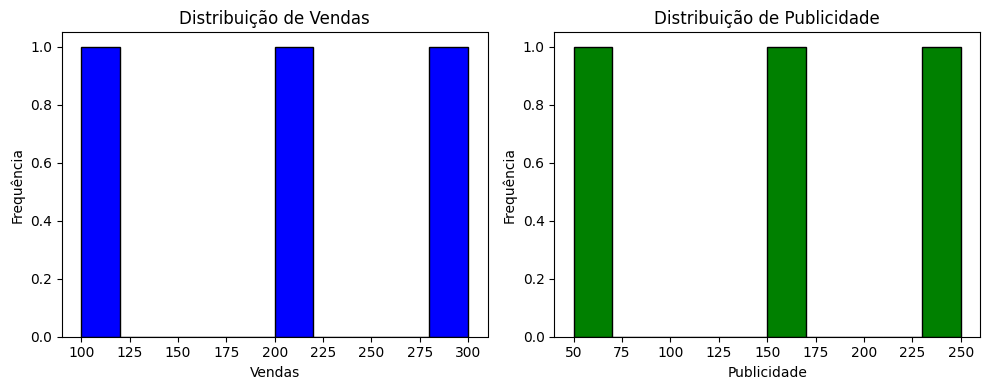

In [ ]:
import matplotlib.pyplot as plt

# Histograma para as variáveis
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Distribuição de 'sales'
ax[0].hist(agg["sales"], bins=10, color="blue", edgecolor="black")
ax[0].set_title("Distribuição de Vendas")
ax[0].set_xlabel("Vendas")
ax[0].set_ylabel("Frequência")

# Distribuição de 'youtube, facebook, newspapers'
ax[1].hist(agg["youtube, facebook, newspapers"], bins=10, color="green", edgecolor="black")
ax[1].set_title("Distribuição de Publicidade")
ax[1].set_xlabel("Publicidade")
ax[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()


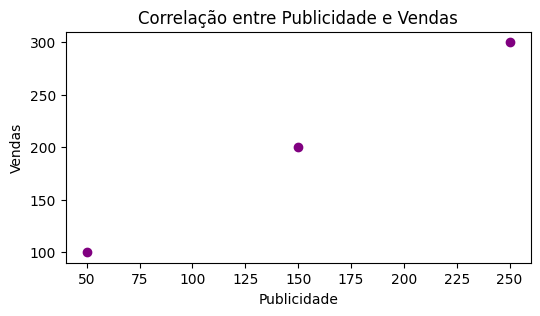

In [ ]:
plt.figure(figsize=(6, 3))
plt.scatter(agg["youtube, facebook, newspapers"], agg["sales"], color="purple")
plt.title("Correlação entre Publicidade e Vendas")
plt.xlabel("Publicidade")
plt.ylabel("Vendas")
plt.show()


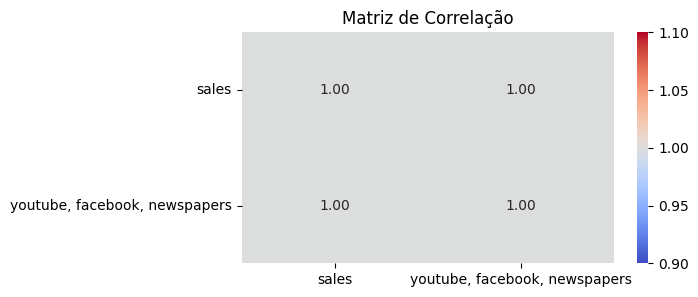

In [ ]:
import seaborn as sns

# Calculando a correlação
corr = agg.corr()

# Gerando o mapa de calor
plt.figure(figsize=(6,3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


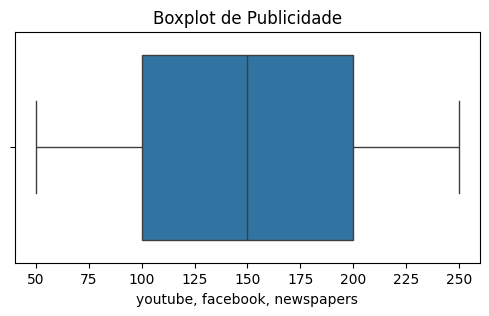

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=agg, x="youtube, facebook, newspapers")
plt.title("Boxplot de Publicidade")
plt.show()


# Modelagem

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
# Definir as variáveis X (independentes) e y (dependente)
X = agg[["youtube, facebook, newspapers"]]  # Features
y = agg["sales"]  # Target


In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)


In [ ]:
print(f"Número de amostras no dataset: {len(agg)}")

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² (coeficiente de determinação): {r2}")


Número de amostras no dataset: 3
Mean Squared Error (MSE): 0.0
R² (coeficiente de determinação): nan


In [ ]:
# Reduzindo o tamanho do conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")


Tamanho do conjunto de treino: 2
Tamanho do conjunto de teste: 1


# Calculando predição


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [ ]:
# Exemplo de tabela com os dados de entrada
data = {
    "youtube": [100, 150, 200],  # Gastos no Youtube
    "facebook": [50, 80, 100],  # Gastos no Facebook
    "newspapers": [20, 30, 40],  # Gastos em Jornais
    "sales": [1000, 1200, 1300]  # Vendas em unidades
}

agg = pd.DataFrame(data)
print(agg)

   youtube  facebook  newspapers  sales
0      100        50          20   1000
1      150        80          30   1200
2      200       100          40   1300


In [ ]:
# Definindo as variáveis independentes (X) e dependente (y)
X = agg[["youtube", "facebook", "newspapers"]]  # Variáveis independentes (investimentos em publicidade)
y = agg["sales"]  # Variável dependente (vendas)


In [ ]:
# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X, y)


LinearRegression()

In [ ]:
# Fazendo predições no próprio conjunto de dados (pois o dataset é pequeno)
y_pred = model.predict(X)

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinação (R²): {r2}")


Coeficiente de determinação (R²): 1.0


Conclusão:
O coeficiente de determinação (R²) fornece uma medida de quão bem o modelo ajusta os dados observados. Um valor mais próximo de 1 indica um bom ajuste.
A predição de vendas é feita com base nos novos valores de investimento que você passa ao modelo.